# Support Vector Regression (SVR)
Forma rapida de interpolar datos.
Penaliza los errores muy grandes.
Hiperparametros:
1. Kernel ='rbf': Radial Basis Function
Captura relaciones no lineales.
2. C=1.0: controla el equilibrio entre ajuste y regularizacion.
Valores bajos: < 1.0
Valores altos: > 1.0
3. epsilon =0.1: Proporciona un margen donde no se penalizan los errores (diametro de tubo).

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#from sklearn.features_selection import SelectKBest, f_regression #Seleccion de variables/caracteristicas

In [2]:
#importamos el dataframe de los contaminantes de la clase 4
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [3]:
from sklearn.preprocessing import StandardScaler # Ayuda a descargar los datos
from sklearn.svm import SVR # Algoritmo SVR

#importamos metricas
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt #para hacer las figuras

In [4]:
# Variable independiente
X=data[['NO','PM25']]
y=data['PM10'] #Variable objetivo (dependiente) a predecir

In [5]:
#Dividimos
split_index = int(len(data)*0.8)

#Escogemos a los datos a utilizar en el entrenamiento
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:] #Ultimo 20% de los datos

#Ahora con la variable objetivo
y_train = y.iloc[:split_index]
y_test =y.iloc[split_index:]

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Datos escalados en x
X_test_scaled = scaler.fit_transform(X_test) #20%

In [7]:
#Creamos el modelo y luego entrenamos
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1) #Creamos el modelo

#Entrenamos
svr_model.fit(X_train_scaled, y_train) #Contiene variable objetivo e independiente y todo en el 80%

SVR(C=1)

In [8]:
#Sacamos predicciones
y_test_pred = svr_model.predict(X_test_scaled)

In [9]:
y_test_pred

array([27.81932313, 38.92844614, 34.56837793, 22.16472845, 31.79195536,
       45.61082094, 41.0478599 , 29.04956361, 41.62171805, 24.49346423,
       18.95603182, 19.63240016, 20.23969656, 27.86597995, 25.40213495,
       36.7990967 , 19.09899338, 35.95045898, 34.00059886, 37.68457419,
       44.36681809, 35.40823799, 20.74233609, 24.44633886, 29.88115835,
       35.60263634, 56.11061658, 19.79497998, 19.84911712, 42.55897288,
       20.20574119, 45.49187087, 41.59355912, 30.07780554, 53.30693609,
       60.58943916, 48.52545462, 39.45613297, 39.63103423, 31.66984001,
       46.91502724, 47.01040142, 41.9103673 , 36.28756035, 25.86993265,
       39.87345194, 53.84967418, 55.20213032, 40.86877037, 28.93114358,
       26.81053463, 27.81702727, 25.21388193, 43.9781942 , 46.97148385,
       46.68731677, 21.20018152, 27.90896037, 34.35576964, 29.1248349 ,
       21.38411097, 39.41333524, 58.8535435 , 36.98945694, 58.59522874,
       57.93523765, 52.69227122, 52.26860955, 44.81190635, 39.21

In [10]:
#Evaluamos el modelo con las metricas
test_mse = mean_squared_error(y_test, y_test_pred) #error cuadratico medio
test_r2 = r2_score(y_test,y_test_pred)

In [11]:
test_mse

56.02220213017183

In [12]:
test_r2

0.7253648621457018

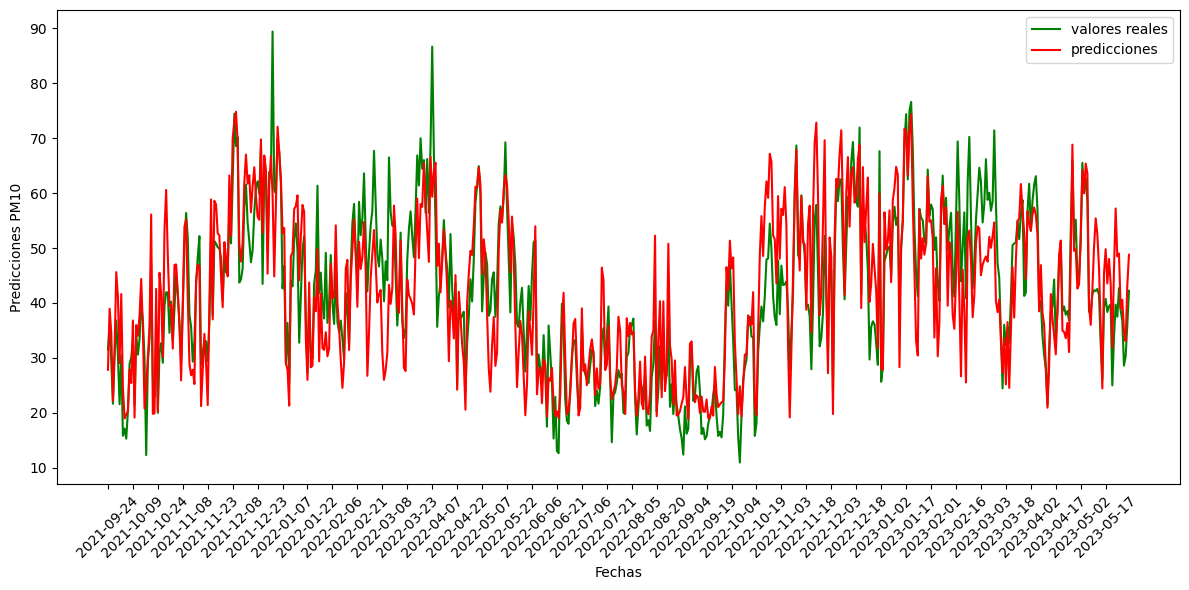

In [21]:
# Graficamos
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, label='valores reales', color='green') #Graficamos ultimo 20% de los datos en el eje x

#Graficamos los datos de las predicciones
plt.plot(data.iloc[split_index:]['fecha'], y_test_pred, label='predicciones', color='red') #20% de la prediccion

plt.xlabel('Fechas') #eje x
plt.ylabel('Predicciones PM10')
plt.legend() #Pone las etiquetas de valores reales y predicciones

#Agrupamos el contenido de las fechas
plt.xticks(data.iloc[split_index:]['fecha'][::15], rotation=45) #marcas en el eje x
# [::15]: poner marcas cada 15 dias y las rota 45 grados las del eje x
plt.tight_layout() # Evita que se soprepongan las marcas
plt.show()

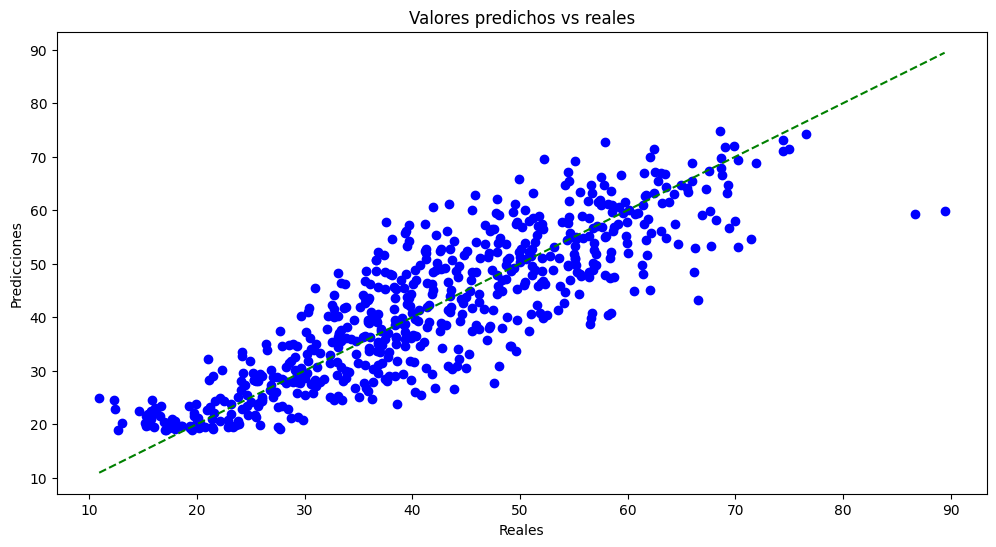

In [27]:
#Grafica de dispersion: eje x, valores reales y eje y, valores de la prediccion
plt.figure(figsize=(12,6))
# Eje x: valores reales
plt.scatter(y_test, y_test_pred, color='blue') #grafica ptos de prueba con la prediccion
# Dibujamos la linea identidad
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'g--', label='linea ideal') #linea punteada (roja) desde el minimo del "test" hasta el maximo y en el eje mismo caso, deben ser mismos valores para que sea la linea identidad
plt.title('Valores predichos vs reales')
plt.xlabel('Reales')
plt.ylabel('Predicciones')
plt.show()

# Aumento de variables temporales
Consiste en extraer informacion relevante a partir de marcas de tiempo (fecha) para agregar al dataframe (se agregan nuevas variables).

In [28]:
# Convertimos la columna fecha
data['fecha']=pd.to_datetime(data['fecha'])

In [29]:
# Extraemos las variables temporales
data['mes']=data['fecha'].dt.month # crea una nueva columna y extrae el mes de la columna fecha

In [30]:
data['dia']=data['fecha'].dt.day

In [31]:
data['dia_semana']=data['fecha'].dt.dayofweek # extrae el dia de la semana

In [33]:
# Nueva columna booleana
#1: sabado o domingo y 0: Cualquier dia de la semana
data['fin_semana']=(data['fecha'].dt.dayofweek>=5).astype(int)

In [35]:
data.head(25)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_semana,fin_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
5,2015-01-06,0.748952,27.977346,23.242718,51.213592,12.902256,40.321608,21.113712,4.024024,1,6,1,0
6,2015-01-07,0.443254,11.297114,16.259762,27.594228,17.055130,30.054598,10.737643,2.192547,1,7,2,0
7,2015-01-08,0.533528,10.527586,21.625862,32.155172,19.150555,33.313953,14.501946,1.962233,1,8,3,0
8,2015-01-09,1.094574,41.795181,32.526678,74.283993,19.482813,55.188679,29.085106,2.781046,1,9,4,0
9,2015-01-10,0.770722,23.455717,27.468599,50.919485,22.689552,39.798507,24.071895,2.559006,1,10,5,1


In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

In [39]:
X=data.drop(columns=['fecha','PM10']) #Todas las variable menos fecha ni PM10

In [38]:
X

,CO,NO,NO2,NOX,O3,PM25,SO2,mes,dia,dia_semana,fin_semana
0,1.050696,22.765528,24.225155,46.987578,23.175150,78.953405,11.554723,1,1,3,0
1,0.807585,32.249608,21.554160,53.800628,17.268366,15.449438,1.895052,1,2,4,0
2,0.640755,21.686916,19.394081,41.071651,15.486486,12.915129,1.436937,1,3,5,1
3,0.726940,24.606272,19.560976,44.165505,17.329032,16.838284,1.809061,1,4,6,1
4,0.530815,11.443182,20.990260,32.439935,14.470588,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3068,0.256722,3.750583,17.284351,21.629371,41.580645,21.170139,2.735683,5,27,5,1
3069,0.286826,3.458886,16.349241,20.230769,36.913761,18.454861,2.331658,5,28,6,1
3070,0.482077,11.448113,24.521154,36.436321,29.697068,16.692857,1.071588,5,29,0,0
3071,0.441455,13.893519,22.615530,37.224537,36.185971,20.888525,1.181818,5,30,1,0


In [46]:
#Variable objetivo
y=data['PM10']
#Selecciona de caracteristicas
selector = SelectKBest(score_func=f_regression,k=5) #Mejores 8 caracteristicas
X_selected = selector.fit_transform(X,y)

In [47]:
X_selected

array([[ 1.05069583, 22.76552795, 24.22515528, 46.98757764, 78.95340502],
       [ 0.80758483, 32.24960754, 21.55416013, 53.80062794, 15.4494382 ],
       [ 0.64075547, 21.68691589, 19.394081  , 41.07165109, 12.91512915],
       ...,
       [ 0.48207721, 11.44811321, 24.52115385, 36.43632075, 16.69285714],
       [ 0.44145455, 13.89351852, 22.6155303 , 37.22453704, 20.88852459],
       [ 0.34040367,  5.35306554, 19.37258348, 25.71035941, 24.78709677]])

In [44]:
# Variable que mas influyen en el modelo de la prediccion
selected_features=X.columns[selector.get_support()]

In [45]:
selected_features

Index(['CO', 'NO', 'NO2', 'NOX', 'PM25'], dtype='object')

In [48]:
#seleccion de caracteristicas por random forest
rf_model = RandomForestRegressor(random_state=42)

In [50]:
rf_model.fit(X,y) #Llamado randomforest para que proporcione las caracteristicas mas importantes

RandomForestRegressor(random_state=42)

In [58]:
importancia_df = pd.DataFrame({'Caracteristicas':X.columns,
                              'Importancia':rf_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

In [59]:
importancia_df

,Caracteristicas,Importancia
5,PM25,0.757290
7,mes,0.079192
2,NO2,0.030219
4,O3,0.029672
3,NOX,0.027143
1,NO,0.025293
6,SO2,0.016471
0,CO,0.014492
8,dia,0.011908
9,dia_semana,0.007141


In [60]:
rednet = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv")

In [62]:
rednet['fecha'] = pd.to_datetime(rednet['fecha']) # La columna fecha sea un fecha explicitamente

In [63]:
# Aseguramos de que el dataframe sea lo mismo
data['fecha'] = pd.to_datetime(rednet['fecha'])

In [64]:
union = pd.merge(data,rednet, on='fecha', how='inner') #juntamos dos tablas o dataframe respecto a la variable fecha y el inner es decirle todo junto con los datos meteorologicos

In [65]:
union

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_semana,fin_semana,RH,TMP,WDR,WSP
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0,50.145719,18.684699,184.998255,1.978709
